## 1. Tipos de fronteras en clasificación

In [1]:

import matplotlib.pyplot as plt
import numpy as np
def do_gaussianXOR(n1=250,n2=250):
    rng = np.random.RandomState(0)
    u = 0.5
    std = 0.3 #el ruido se agrega aca
    primer_c = rng.normal(loc=[u,u],scale=std,size=(n1,2))
    segundo_c = rng.normal(loc=[-u,u],scale=std,size=(n2,2))
    tercer_c = rng.normal(loc=[-u,-u],scale=std,size=(n1,2))
    cuarto_c = rng.normal(loc=[u,-u],scale=std,size=(n2,2))
    X_train = np.vstack((primer_c,segundo_c,tercer_c,cuarto_c))
    Y_train = np.hstack((np.zeros(n1),np.ones(n2),np.zeros(n1),np.ones(n2)))   
    X_test = rng.uniform(low=-1.0,high=1.0,size=( (n1+n2),2))
    Y_test = np.logical_xor(X_test[:,0] > 0, X_test[:,1] > 0)
    return X_train,Y_train,X_test,Y_test


>a) Construya el conjunto de datos (dataset) y describa el proceso de creación de éstos. Determine cuántos registros contiene cada conjunto y visualı́celos.

(1000, 2)
(1000,)
(500, 2)
(500,)


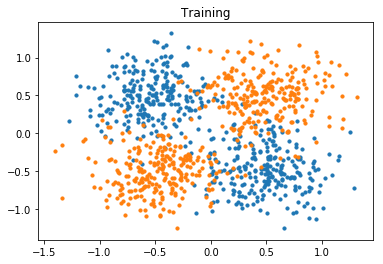

In [2]:
X_train,Y_train,X_test,Y_test = do_gaussianXOR()

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

X_train_t=X_train[np.where(Y_train)]
X_train_f=X_train[np.where(1-Y_train)]

plt.title("Training")
plt.scatter(X_train_t[:,0],X_train_t[:,1],s=10 )
plt.scatter(X_train_f[:,0],X_train_f[:,1],s=10 )


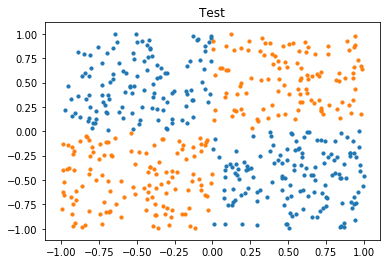

In [3]:
X_test_t=[x for x in X_test if np.logical_xor(x[0] > 0, x[1] > 0)]
X_test_t=np.asarray(X_test_t)
X_test_f=[x for x in X_test if not np.logical_xor(x[0] > 0, x[1] > 0)]
X_test_f=np.asarray(X_test_f)


plt.title("Test")
plt.scatter(X_test_t[:,0],X_test_t[:,1],s=10 )
plt.scatter(X_test_f[:,0],X_test_f[:,1],s=10 )

Hay 1000 datos de entrenamiento y 500 datos de pruebas, estos son creados sinteticamente aplicando cuatro distribuciones normales en  los puntos $\{(-0.5,-0.5),(0.5,-0.5),(-0.5,0.5),(0.5,0.5)\}$ con desviacion estandar de 0.3. Luego estos son etiquetados verdadero si estan en el primer y tercer cuadrantes, y falso si estan en el segundo y cuarto cuadrante.

In [4]:

def visualize_border(model,x,y,title=""):
    fig, axis = plt.subplots(1, 1,figsize=(12, 6))

    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #or predict_proba
    Z = Z.reshape(xx.shape)
    Zplot = Z > 0.5

    axis.scatter(x[:,0],x[:,1],s=50,c=y,zorder=10,cmap=plt.cm.winter)
    axis.contour(xx, yy, Z,levels=[-1, 0, 1])
    axis.pcolormesh(xx, yy, Zplot ,cmap=plt.cm.YlGn)
    plt.title(title)
    plt.show()

>b) Entrene el clasificador Linear Discriminant Analysis (LDA) y visualice la frontera de decisión que define este algoritmo. Comente cualitativamente lo que observa.

C:\Users\Ignacio\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


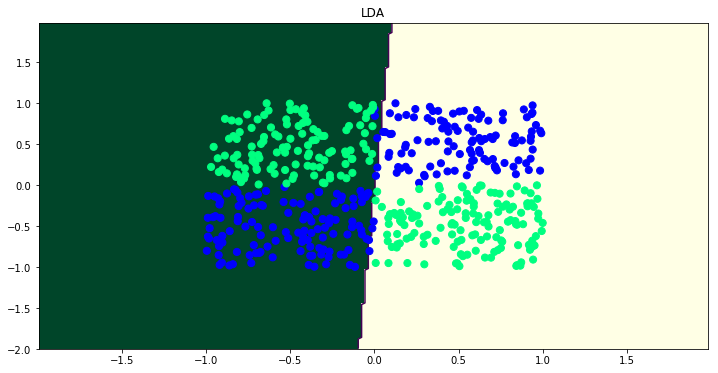

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA()
model.fit(X_train,Y_train)
visualize_border(model,X_test,Y_test,"LDA")

Se aprecia que la frontera de decision es una recta, lo que es de esperar ya que LDA es un metodo de separacion lineal. Esta claro que esta recta no puede discernir correctamente las clases XOR.

>c) Entrene el clasificador Quadratic Discriminant Analysis (QDA) y visualice la frontera de decisión que define este algoritmo. Analice cualitativamente lo que observa y compare con LDA, en qué difieren y en qué se asemejan ¿Qué distribución de probabilidad asumen cada uno?

C:\Users\Ignacio\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


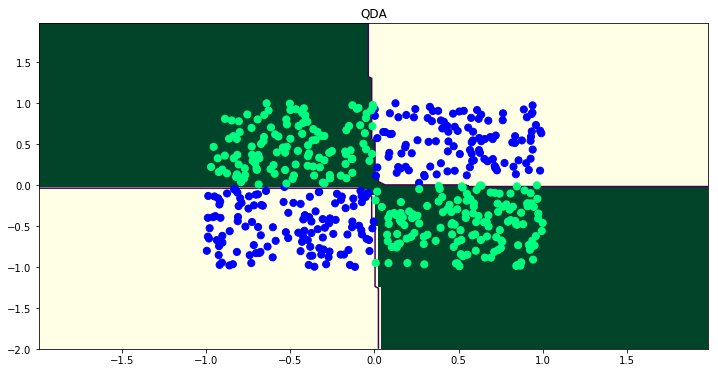

In [6]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model = QDA()
model.fit(X_train,Y_train)
visualize_border(model,X_test,Y_test,"QDA")

Se aprecia que QDA logra diferenciar correctamente las clases, esto debido a que la frontera de este metodo son funciones cuadraticas, ambos asumen una distribucion normal de los datos.


In [7]:
from ipywidgets import interactive
def visualize_border_interactive1(param1):
    model = train_model(param1)
    visualize_border(model,X_test,Y_test) 
def visualize_border_interactive2(param1,param2):
    model = train_model(param1,param2)
    visualize_border(model,X_test,Y_test) 

>d) Demuestre experimentalmente que una Máquina de Vectores de Soporte (SVM) Lineal no puede resolver el problema, para esto construyala a través de sklearn. Mediante la widget interactiva explore diferentes valores del parámetro de regularización CC. Analice cualitativamente lo observado, para validar su análisis cualitativo calcule el accuracy sobre el conjunto de pruebas.

In [8]:
from sklearn.svm import SVC as SVM 
def train_model(param1):
    model= SVM()
    C = 10**(param1)
    print("Param C= ",C)
    model.set_params(C=C,kernel='linear')
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model
p_min = -6 
p_max = 4
interactive(visualize_border_interactive1,param1=(p_min,p_max))

interactive(children=(IntSlider(value=-1, description='param1', max=4, min=-6), Output()), _dom_classes=('widg…

Ya que SVM es un clasificador lineal, este no puede separar correctamente las clases, independiente del parametro de parametrizacion C de este. Esto se aprecia experimentalmente haciendo variar C entre $10^{-6}$ y $10^{4}$

>e) Demuestre experimentalmente que una Máquina de Vectores de Soporte (SVM) no Lineal puede resolver el problema, para ésto construya una SVM no Lineal a través de un kernel . Mediante la widget interactiva explore diferentes valores del parámetro de regularización C y con diferentes kernels. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.




In [9]:
def train_model(param1,param2):
    model= SVM()
    C = 10**(param1)
    gamma=10**param2
    print("Param C= ",C)
    print("Param gamma= ",gamma)
    model.set_params(C=C,kernel='rbf',gamma=gamma)
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model

interactive(visualize_border_interactive2,param1=(-6,4),param2=(-3,5))

interactive(children=(IntSlider(value=-1, description='param1', max=4, min=-6), IntSlider(value=1, description…

Se entrena una SVM con un kernel rbf, dado por $\exp{(-\gamma||x-x'||^2)}$, se observa que se logra  separar correctamente las clases para distintos valores de gamma, sin embargo, para altos valores de gamma hay un fuerte overfitting.

In [10]:
def train_model(param1,param2):
    model= SVM()
    C = 10**(param1)
    gamma=2**param2
    print("Param C= ",C)
    print("Param gamma= ",gamma)
    model.set_params(C=C,kernel='poly',gamma=gamma)
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    return model

interactive(visualize_border_interactive2,param1=(-6,2),param2=(-1,6))

interactive(children=(IntSlider(value=-2, description='param1', max=2, min=-6), IntSlider(value=2, description…

Para el caso de un filtro polinomial cubico $(\gamma\langle x,x'\rangle)^3$, los resultados no son satisfactorios, la SVM no logra diferenciar las clases, esto a pesar de que teoricamente un borde cubico deberia ser capas de hacerlo. Se conjetura que haciendo variar $\gamma$ y C se obtienen mejores resultados, sin embargo, para valores muy grandes de estos el metodo se demora demasiado.

Por otro lado, el parametro regularizador C representa que tanto intereses se tiene en minimizar el margen de la frontera entre separar correctamente las clases, si C es mayor tiene mas importancia el separar las clases y si C es menor es mas importante el minimizar el margen.



> f) Demuestre experimentalmente que un Árbol de Decisión de múltiples niveles puede resolver el problema ¿Qué pasa con un nivel? Para ésto contruya el Árbol de Decisión a través de sklearn, puede utilizar el criterio y la función de partición que prefiera. Mediante la widget interactiva explore diferentes valores del parámetro de máxima profundidad del árbol. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [11]:
from sklearn.tree import DecisionTreeClassifier as Tree

def train_model(param1):
    model = Tree() #edit the train_model function
    model.set_params(max_depth=param1,criterion='gini',splitter='best')

    print("Max Depth",param1)
    model.fit(X_train,Y_train)
    print("Test Accuracy: ",model.score(X_test,Y_test))
    
    return model




p_min = 1 #define your range
p_max = 20 #define your range
interactive(visualize_border_interactive1,param1=(p_min,p_max))

interactive(children=(IntSlider(value=10, description='param1', max=20, min=1), Output()), _dom_classes=('widg…

La profundida maxima es la maxima distancia desde la raiz a una hoja en el arbol, cuanto mayor sea la profundidad del arbol este es mas complejo, se aprecia que para este problema basta una profundida maxima de 3 para separar los grupos correctamente, utilizando el criterio gini y la funcion de particion best. Por otro lado, se aprecia que para mayores valores de profundidad maxima no hay una mejora significativa, solo es mas suceptible al overfiting.

>g) Demuestre experimentalmente que una red neuronal artificial con 1 capa escondida puede resolver satisfactoriamente el problema. Para esto construya un perceptrón multi-capa, con una capa escondida, variando el número de neuronas $N_h$ a través de la widget interactiva. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def train_model(param):
    n_h=2**(param)
    print("Neuron hidden = ",n_h)
    model = Sequential()
    model.add(Dense(n_h, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(X_train, Y_train, epochs=25, batch_size=128, verbose=0)
    print("Test Accuracy: ",model.evaluate(X_test, Y_test,batch_size=128,verbose=0)[1])
    return model
p_min = 0 #define your range
p_max = 10 #define your range
interactive(visualize_border_interactive1,param1=(p_min,p_max))

C:\Users\Ignacio\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


interactive(children=(IntSlider(value=5, description='param1', max=10), Output()), _dom_classes=('widget-inter…

La cantidad de neuronas escondidas es el numero de nodos en la segunda capa de la red neuronal, esta representa la cantidad de valores libres del modelo, por lo tanto, si se aumenta esta demasiado el modelo es propenso a overfitting. Por otro lado, se aprecia que para valores de neuronas escondidas mayores que 8 el modelo separa de forma relativamente correcta el dataset.

>h) Construya un algoritmo kk-NN para la clasificación del problema. Mediante la widget interactiva explore diferentes valores del parámetro kk. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente lo observado.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
def train_model(param):
    K=param
    print("Numero de Vecinos: ",K)
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=K)
    
    model.fit(X_train, Y_train)
    print("Test Accuracy: ",model.score(X_test, Y_test))
    return model
p_min = 1#efine your range
p_max = 20 #define your range
interactive(visualize_border_interactive1,param1=(p_min,p_max))

interactive(children=(IntSlider(value=10, description='param1', max=20, min=1), Output()), _dom_classes=('widg…

El parametro K es la cantidad de vecinos mas cercanos con los que se compara un dato, es decir, un dato sera etiquetado dependiendo de los "votos" de los K vecinos mas cercanos. Esto implica que para una mayor valor de K, el metodo sera mas lento pero mas robusto. Se aprecia que para todo K mayor que 1 el metodo separa correctamente, pero para K mayor que 10 aproximadamente, el borde se parece mas a los cuadrantes, que es lo esperado.

>i) Vuelva a generar datos, pero ahora de manera desbalanceada por clase, con más ejemplos en una clase que en otra, pero manteniendo el conjunto de pruebas para verificación. Visualicelo apropiadamente.




(510, 2)
(510,)
(255, 2)
(255,)


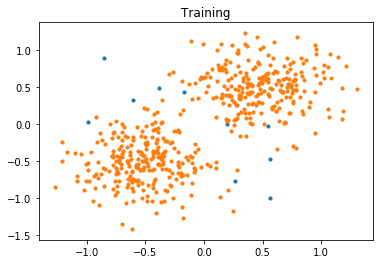

In [14]:
X_train,Y_train,X_test,Y_test = do_gaussianXOR(n1=250,n2=5)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

X_train_t=X_train[np.where(Y_train)]
X_train_f=X_train[np.where(1-Y_train)]

plt.title("Training")
plt.scatter(X_train_t[:,0],X_train_t[:,1],s=10 )
plt.scatter(X_train_f[:,0],X_train_f[:,1],s=10 )


>j) Escoga las Máquinas de Soporte Vectorial con kernel RBF (C=1) o un Árbol de Decisión (depth=5) para entrenar sobre estos datos desbalanceados, mida el Accuracy sobre el conjunto de pruebas.

Test Accuracy:  0.5568627450980392


C:\Users\Ignacio\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


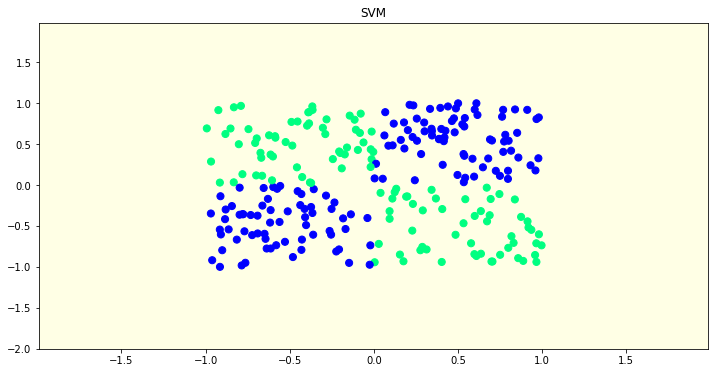

In [15]:
model= SVM()
model.set_params(C=1,kernel='rbf',gamma=1)
model.fit(X_train,Y_train)
print("Test Accuracy: ",model.score(X_test,Y_test))
visualize_border(model,X_test,Y_test,"SVM") 

Test Accuracy:  0.5725490196078431


C:\Users\Ignacio\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


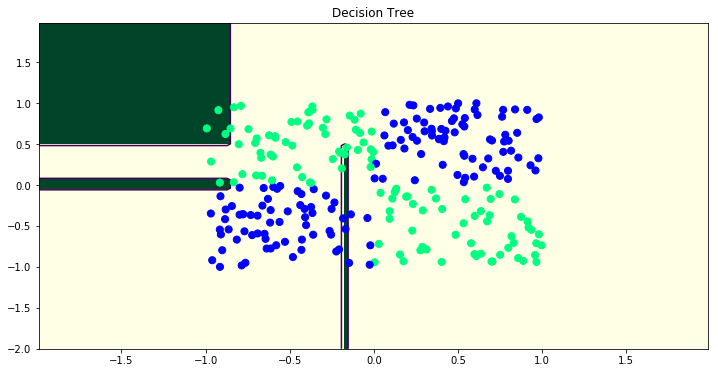

In [16]:
model = Tree()
model.set_params(max_depth=5,criterion='gini',splitter='best')

model.fit(X_train,Y_train)
print("Test Accuracy: ",model.score(X_test,Y_test))
visualize_border(model,X_test,Y_test,"Decision Tree") 


Se aprecia que el error de prediccion es muy bajo, del 56%~, o sea, es marginalmente mejor que elegir una clase aleatoriamente.

>k) Ahora verifique que se puede mejorar la métrica a través de poner un peso en la función objetivo para las distintas clases, seteelo a mano o utilize la función balanced para que reduzca el impacto de lo datos de la clase mayoritaria en la función objetivo o que aumente el impacto de los datos de la clase minoritaria.

Test Accuracy:  0.8980392156862745


C:\Users\Ignacio\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


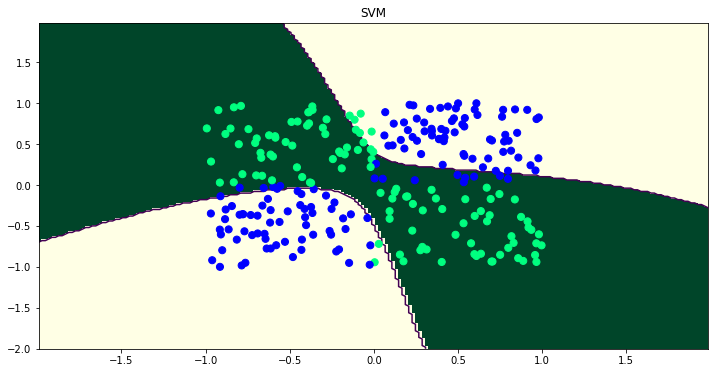

In [17]:

model= SVM()
model.set_params(C=1,kernel='rbf',class_weight= 'balanced') #for svm
model.fit(X_train,Y_train)
print("Test Accuracy: ",model.score(X_test,Y_test))

visualize_border(model,X_test,Y_test,"SVM") 

C:\Users\Ignacio\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Test Accuracy:  0.7607843137254902


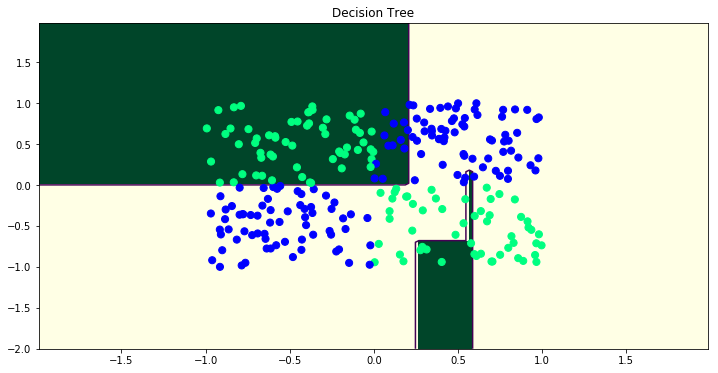

In [18]:
model = Tree()

model.set_params(max_depth=5,criterion='gini',splitter='best',class_weight= 'balanced') 

model.fit(X_train,Y_train)
print("Test Accuracy: ",model.score(X_test,Y_test))
visualize_border(model,X_test,Y_test,"Decision Tree") 

Hay una clara mejoria en ambos metodos, esto debido a que los pesos de cada dato dicen la cantidad de "informacion" que estos poseen, y utilizando los pesos con "balanced" significa que si una clase tiene menos datos entonces son mas importantes estos.